In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import figure
%matplotlib inline
import os

In [2]:
df = pd.read_csv('loc2.csv')
dataset = df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 7 columns):
Unnamed: 0         3776 non-null int64
restaurant_name    3776 non-null object
Location           3776 non-null object
Cuisine            3776 non-null object
Price for 2        3776 non-null int64
Ratings            3776 non-null float64
Votes              3776 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 206.6+ KB


In [4]:
from sklearn.linear_model import LogisticRegression #Logistic Regression is a Machine Learning classification algorithm
from sklearn.linear_model import LinearRegression #Linear Regression is a Machine Learning classification algorithm
from sklearn.model_selection import train_test_split #Splitting of Dataset
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [5]:
df['Price for 2'] = df['Price for 2'].astype(str)
df['Price for 2'] = df['Price for 2'].apply(lambda x: x.replace(',','.'))
df['Price for 2'] = df['Price for 2'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 7 columns):
Unnamed: 0         3776 non-null int64
restaurant_name    3776 non-null object
Location           3776 non-null object
Cuisine            3776 non-null object
Price for 2        3776 non-null float64
Ratings            3776 non-null float64
Votes              3776 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 206.6+ KB


In [6]:
df.shape

(3776, 7)

In [7]:
df.describe()

,Unnamed: 0,Price for 2,Ratings,Votes
count,3776.000000,3776.000000,3776.000000,3776.000000
mean,1887.500000,556.242055,3.571054,174.406780
std,1090.181636,542.913351,0.430255,358.523332
min,0.000000,60.000000,2.000000,3.000000
25%,943.750000,300.000000,3.300000,25.000000
50%,1887.500000,400.000000,3.600000,57.000000
75%,2831.250000,600.000000,3.900000,167.000000
max,3775.000000,5500.000000,4.900000,7320.000000


In [8]:
df.corr()

,Unnamed: 0,Price for 2,Ratings,Votes
Unnamed: 0,1.000000,-0.364529,-0.593516,-0.560854
Price for 2,-0.364529,1.000000,0.304923,0.254482
Ratings,-0.593516,0.304923,1.000000,0.452003
Votes,-0.560854,0.254482,0.452003,1.000000


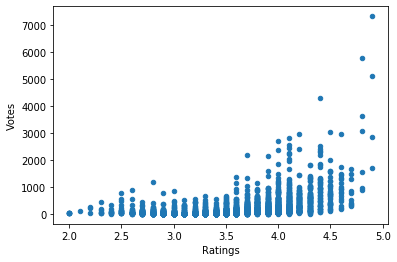

In [9]:
df.plot.scatter(x='Ratings', y='Votes')

In [10]:
#Encoding Variable
def Encode(df):
    for column in df.columns[~df.columns.isin(['Ratings', 'Price for 2', 'Votes'])]:
        df[column] = df[column].factorize()[0]
    return df
df_en = Encode(df.copy())

In [11]:
#Defining the independent variables and dependent variables
x = df[df.columns[:1]]
y = df['Ratings']

In [12]:
#Getting Test and Training Set
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2,random_state=5)

In [13]:
#Preparing a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3667482765104372

In [14]:
#Preparing a Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

-0.20905326313726036

In [15]:
#Preparing a Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.10615092980510055

In [16]:
RanP = pd.DataFrame({ "actual": y_test, "pred": y_predict })
RanP

,actual,pred
2949,3.5,3.5052
2724,3.6,3.2660
2458,3.1,3.8018
2219,2.8,3.5664
3151,3.0,3.2230
...,...,...
3581,3.2,3.2706
48,4.3,4.4536
2080,2.7,3.5840
573,4.5,3.8420


NameError: name 'y_test_pred' is not defined

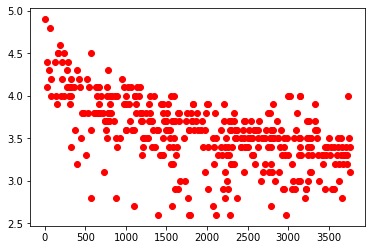

In [20]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_test_pred, color = 'black', linewidth = 2)
plt.xticks(())
plt.yticks(())
plt.show()